In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


plt.rcdefaults()
matplotlib.style.use('seaborn')

C:\Users\guill\AppData\Local\Temp\ipykernel_15588\2547109472.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [9]:
def tanh(x):
    th = ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))
    return th

def sigmoid(x):
    sgm = 1/(1+ np.exp(-x))
    return sgm

def relu(x):
    rel = np.zeros(x.size)
    for i in range(x.size):
        if x[i] > 0:
            rel[i] = x[i]
    return rel

In [10]:
x = np.linspace(-10,10, 100)

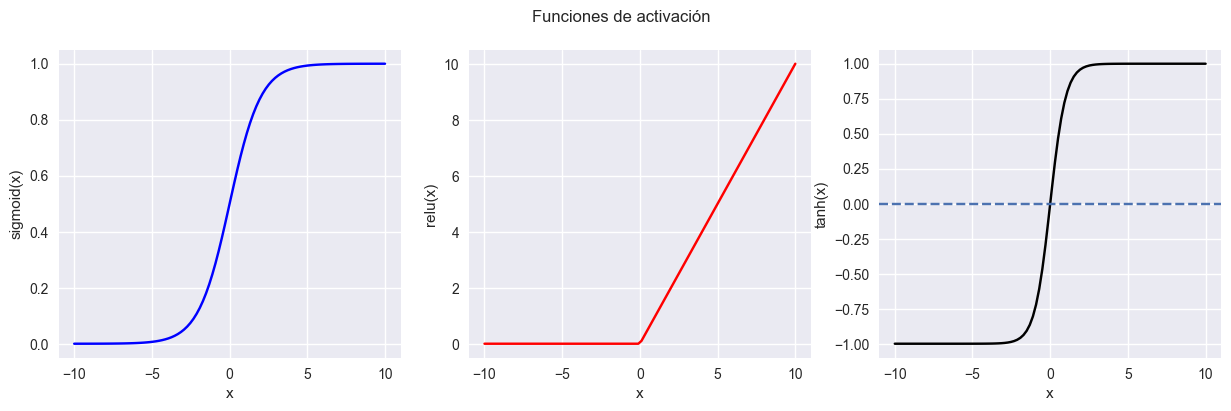

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(x,sigmoid(x), color='blue')
ax[1].plot(x,relu(x), color='red' )
ax[2].plot(x,tanh(x), color='black' )
ax[2].axhline(y=0, linestyle = '--')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')
ax[0].set_ylabel('sigmoid(x)')
ax[1].set_ylabel('relu(x)')
ax[2].set_ylabel('tanh(x)')
fig.suptitle('Funciones de activación')
plt.show()

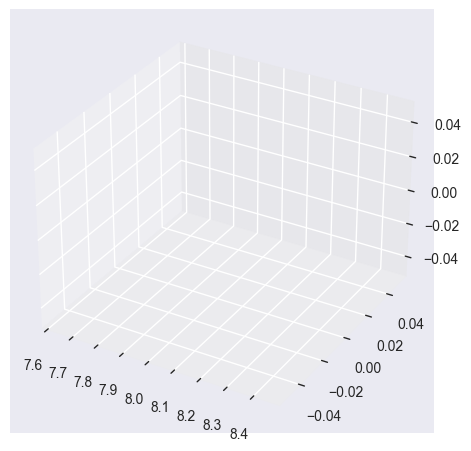

In [12]:
fig = plt.figure()

eje = fig.add_subplot(111, projection='3d')

vecx = [8.0400000000, 0.0000000000, 0.0000000000]
vecy = [0.0000000000, 8.5277077811, 0.0000000000]
vecz = [0.0000000000, 0.0000000000, 31.3702770415]

eje.plot(vecx[0],vecx[1],vecx[2], color='red')
plt.show()


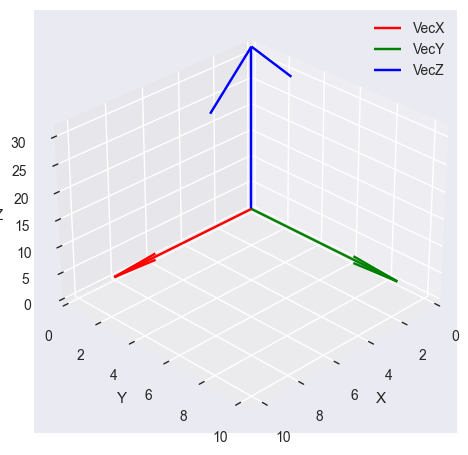

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los vectores
vecx = [8.0400000000, 0.0000000000, 0.0000000000]
vecy = [0.0000000000, 8.5277077811, 0.0000000000]
vecz = [0.0000000000, 0.0000000000, 31.3702770415]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Origen de los vectores
origin = [0, 0, 0]

# Graficar los vectores
ax.quiver(*origin, *vecx, color='r', label='VecX')
ax.quiver(*origin, *vecy, color='g', label='VecY')
ax.quiver(*origin, *vecz, color='b', label='VecZ')

# Configurar los límites del gráfico

max_val = max(max(vecx), max(vecy), max(vecz))
ax.set_xlim([0, max_val/3])
ax.set_ylim([0, max_val/3])
ax.set_zlim([0, max_val])

# Etiquetar los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Configurar la vista

ax.view_init(elev=30, azim=45)
# Mostrar el gráfico
ax.legend()
plt.show()


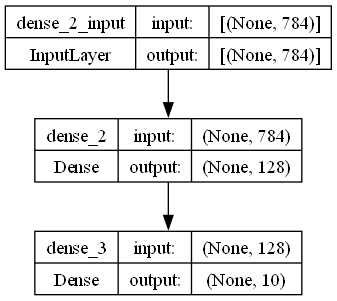

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Crear un modelo de RNA
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Visualizar la arquitectura del modelo
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


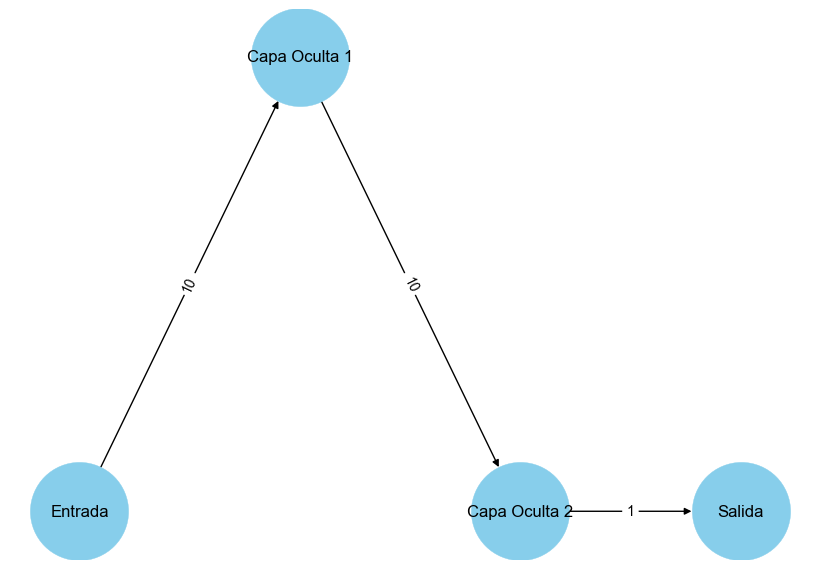

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un gráfico dirigido
G = nx.DiGraph()

# Agregar nodos para las capas
G.add_node("Entrada")
G.add_node("Capa Oculta 1")
G.add_node("Capa Oculta 2")
G.add_node("Salida")

# Agregar conexiones entre las capas
G.add_edge("Entrada", "Capa Oculta 1", label="10")
G.add_edge("Capa Oculta 1", "Capa Oculta 2", label="10")
G.add_edge("Capa Oculta 2", "Salida", label="1")

# Dibujar el gráfico
pos = {
    "Entrada": (0, 1),
    "Capa Oculta 1": (1, 1),
    "Capa Oculta 1": (1, 2),
    "Capa Oculta 1": (1, 3),
    "Capa Oculta 2": (2, 1),
    "Salida": (3, 1)
}

nx.draw(G, pos, with_labels=True, node_size=5000, node_color="skyblue", font_size=12, font_color="black")

# Agregar etiquetas a las conexiones
labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [5]:
!pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 8.3 MB/s eta 0:00:00


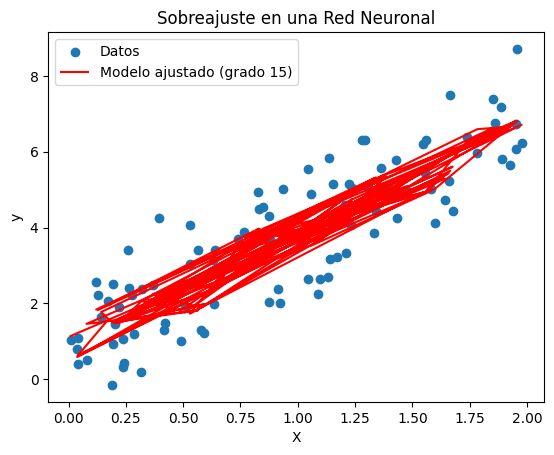

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Marco Teórico:
# El sobreajuste (overfitting) ocurre cuando un modelo de aprendizaje automático se ajusta demasiado
# a los datos de entrenamiento, capturando incluso el ruido y la variabilidad irrelevante. 
# En este gráfico, generaremos datos sintéticos con un modelo cuadrático y luego intentaremos ajustar
# un modelo polinómico de grado superior para ilustrar cómo puede conducir a un sobreajuste.

# Generar datos sintéticos
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grado del polinomio para el ajuste
degree = 15

# Transformar los datos a un polinomio de grado degree
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Ajustar un modelo lineal (regresión polinómica)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

# Predecir sobre los datos de entrenamiento y prueba
y_train_predict = lin_reg.predict(X_poly_train)
y_test_predict = lin_reg.predict(X_poly_test)

# Graficar los resultados
plt.scatter(X, y, label='Datos')
plt.plot(X, lin_reg.predict(poly_features.transform(X)), 'r-', label='Modelo ajustado (grado ' + str(degree) + ')')
plt.title('Sobreajuste en una Red Neuronal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


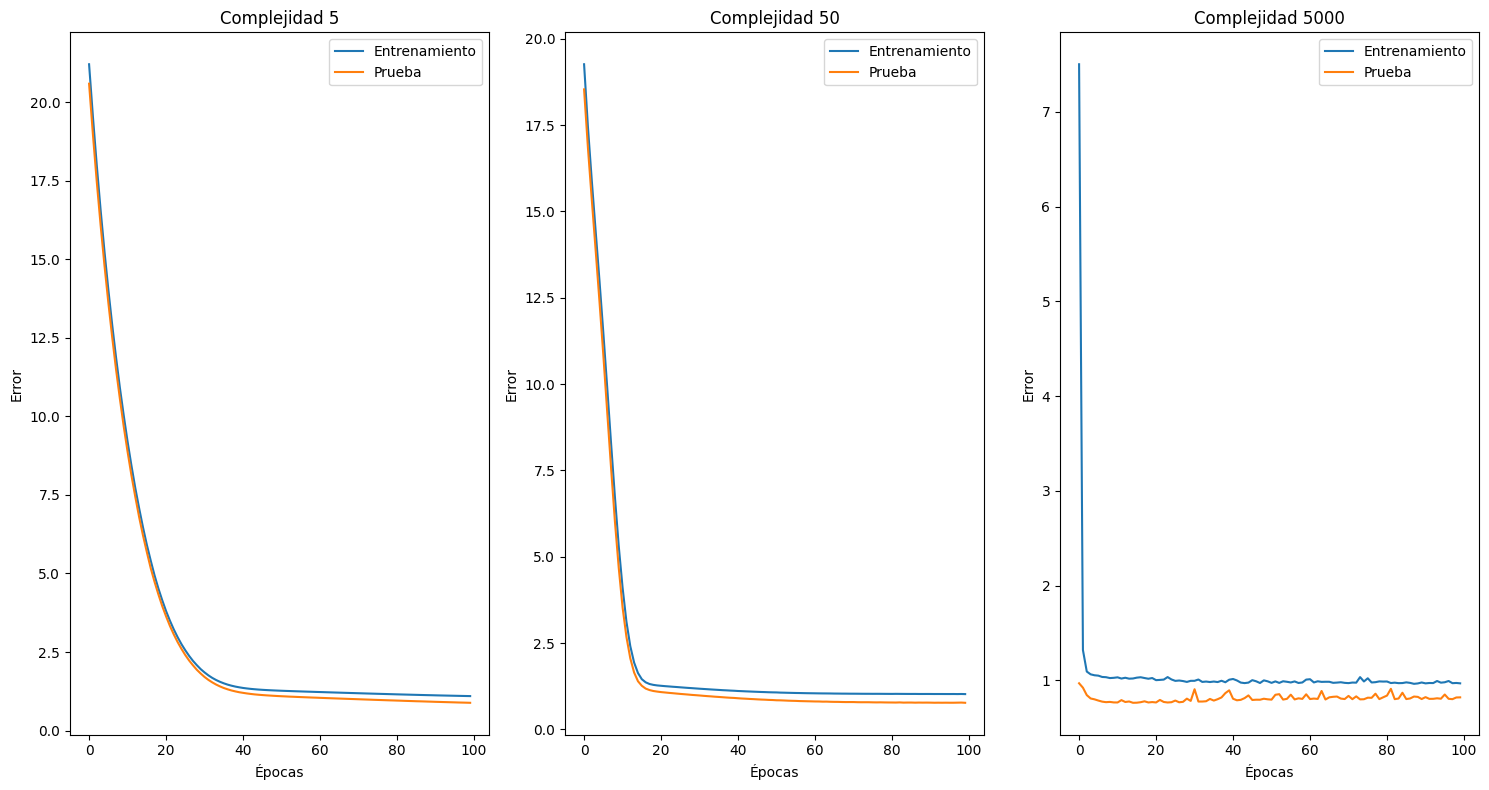

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(1000, 1)
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(1000, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grados de complejidad de la red neuronal
complexities = [5, 50, 5000]

plt.figure(figsize=(15, 8))

for i, complexity in enumerate(complexities, 1):
    # Definir la arquitectura de la red neuronal
    model = keras.Sequential([
        keras.layers.Dense(complexity, activation='relu', input_shape=(1,)),
        keras.layers.Dense(1)
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo y registrar la historia de entrenamiento
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

    # Graficar el error en función de las épocas
    plt.subplot(1, 3, i)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Prueba')
    plt.title(f'Complejidad {complexity}')
    plt.xlabel('Épocas')
    plt.ylabel('Error')
    plt.legend()

plt.tight_layout()
plt.show()
